In [1]:
import pandas as pd
import numpy as np
import nltk
import tensorflow as tf
from keras import losses, callbacks, optimizers

df = pd.read_csv('https://drive.google.com/uc?id=15RfMD9lNkpS3cVN7j3_dsJKZ8_5RJG5z')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [2]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

dates = df['date'].values
temps = df['meantemp'].values

train_set = windowed_dataset(temps, window_size=2, batch_size=3, shuffle_buffer=1000)

for data in train_set:
    print(data)
    break



(<tf.Tensor: shape=(3, 2, 1), dtype=float64, numpy=
array([[[17.33333333],
        [19.16666667]],

       [[29.875     ],
        [30.875     ]],

       [[22.66666667],
        [23.42857143]]])>, <tf.Tensor: shape=(3, 1), dtype=float64, numpy=
array([[14.42857143],
       [33.375     ],
       [22.5       ]])>)


2025-11-04 17:15:26.545406: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-04 17:15:26.545683: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-04 17:15:26.546180: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-11-04 17:15:26.546234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-04 17:15:26.546410: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


# Univariate Time Series
adalah serangkaian data yang direkam dalam interval waktu yang berurutan dimana setiap titik data memiliki satu variable yg diamati atau diukur. artinya kita hanya memperhatikan satu variable dalam rentang waktu tertentu

Text(0.5, 1.0, 'Temperature averages over time')

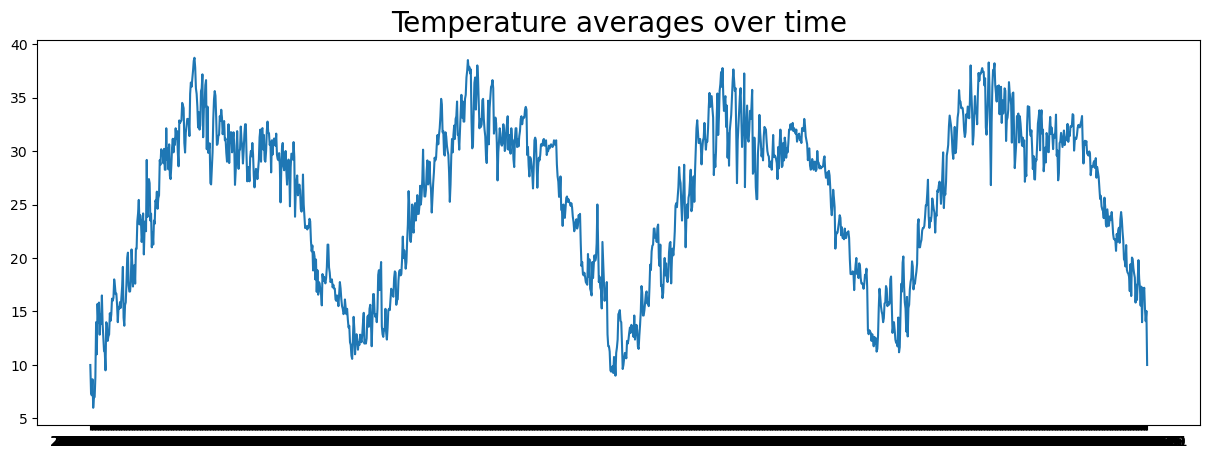

In [4]:
from keras.layers import Dense, LSTM, Input
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf

df.isnull().sum()
plt.figure(figsize=(15, 5))
plt.plot(dates, temps)
plt.title('Temperature averages over time', fontsize=20)


In [5]:
train_set = windowed_dataset(temps, window_size=60, batch_size=100, shuffle_buffer=1000)
model = Sequential([
    Input(shape=(60, 1)),
    LSTM(64, return_sequences=True),
    LSTM(64),
    Dense(30, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1)
])

optimizer = optimizers.SGD(learning_rate=1e-4, momentum=0.9)
model.compile(
    optimizer= optimizer,
    loss=losses.Huber(),
    metrics=["mae"]
)
history = model.fit(
    train_set,
    epochs=100)

forecast = history.model.predict(train_set)
forecast

Epoch 1/100


2025-11-04 17:43:26.684670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2025-11-04 17:43:26.787112: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node SGD/AssignVariableOp.


15/15 [==============================] - 9s 273ms/step - loss: 25.3184 - mae: 25.8184
Epoch 2/100
 3/15 [=====>........................] - ETA: 0s - loss: 24.8613 - mae: 25.3613

2025-11-04 17:43:35.031908: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5422115899415287366


15/15 [==============================] - 0s 25ms/step - loss: 25.0193 - mae: 25.5193
Epoch 3/100
15/15 [==============================] - 0s 25ms/step - loss: 24.6609 - mae: 25.1609
Epoch 4/100
15/15 [==============================] - 0s 25ms/step - loss: 24.2680 - mae: 24.7680
Epoch 5/100
15/15 [==============================] - 0s 25ms/step - loss: 23.8554 - mae: 24.3554
Epoch 6/100
15/15 [==============================] - 0s 26ms/step - loss: 23.4023 - mae: 23.9023
Epoch 7/100
15/15 [==============================] - 0s 25ms/step - loss: 22.8414 - mae: 23.3414
Epoch 8/100
15/15 [==============================] - 0s 22ms/step - loss: 22.1216 - mae: 22.6216
Epoch 9/100
15/15 [==============================] - 0s 26ms/step - loss: 21.1905 - mae: 21.6905
Epoch 10/100
15/15 [==============================] - 0s 26ms/step - loss: 19.9605 - mae: 20.4605
Epoch 11/100
15/15 [==============================] - 0s 20ms/step - loss: 18.2971 - mae: 18.7971
Epoch 12/100
15/15 [====================

2025-11-04 17:44:21.297061: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 3143231153604464819
2025-11-04 17:44:21.297094: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4417640807475059286


array([[28.646923],
       [27.543236],
       [15.299488],
       ...,
       [17.572273],
       [22.43812 ],
       [21.222757]], dtype=float32)

# Multivariate Time Series
adalah rangkaian data dimana setiap titik data terdiri dari beberapa variable yang diamati atau diukur secara bersamaan dalam interval waktu yang berurutan.

In [6]:
df = pd.read_csv('https://drive.google.com/uc?id=1AZRfFoyekqSYpri5183RmJjciRGz_ood', sep=',', infer_datetime_format=True, index_col='datetime', header=0)
df.head()

/var/folders/m7/sjw8yb_1677_b06x0yxyy00m0000gq/T/ipykernel_31735/4016770128.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('https://drive.google.com/uc?id=1AZRfFoyekqSYpri5183RmJjciRGz_ood', sep=',', infer_datetime_format=True, index_col='datetime', header=0)


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
def normalize_series(data, min, max):
    data = data - min
    data = data / max
    return data

data = df.values
data = normalize_series(data, np.min(data), np.max(data, axis=0))

N_FEATURES = len(df.columns)
SPLIT_TIME = int(len(data) * 0.5)

x_train = data[:SPLIT_TIME]
x_valid = data[SPLIT_TIME:]

def create_windowed_dataset(series, batch_size, n_past=24, n_future=24, shift=1):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(size=n_past + n_future, shift=shift, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(n_past + n_future))
    dataset = dataset.map(lambda window: (window[:n_past], window[n_past:]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

BATCH_SIZE = 32
N_PAST = 24
N_FUTURE = 24
SHIFT = 1

train_set = create_windowed_dataset(x_train, BATCH_SIZE, N_PAST, N_FUTURE, SHIFT)
valid_set = create_windowed_dataset(x_valid, BATCH_SIZE, N_PAST, N_FUTURE, SHIFT)

model = Sequential([
    Input(shape=(N_PAST, N_FEATURES)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(N_FEATURES)
])

class myCallback(callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < 0.055 and logs.get('val_mae') < 0.055:
            print("\nMAE is below 0.03, stopping training")
            self.model.stop_training = True

callbacks = myCallback()

optimizer = optimizers.Adam(learning_rate=1e-3)
model.compile(
    optimizer= optimizer,
    loss=losses.MeanSquaredError(),
    metrics=["mae"]
)
model.fit(
    train_set,
    epochs=100,
    validation_data=valid_set,
    callbacks=[callbacks],
    verbose=1
)

Epoch 1/100


2025-11-04 18:34:12.789453: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node Adam/AssignAddVariableOp.


   1349/Unknown - 15s 9ms/step - loss: 0.0260 - mae: 0.0909

2025-11-04 18:34:27.542777: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14511604846952171743
2025-11-04 18:34:27.542794: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 8235122533509949891
2025-11-04 18:34:27.542799: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 3694026923595591951
2025-11-04 18:34:27.542805: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 11154634291628065742
2025-11-04 18:34:27.542822: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4367646882043200583
2025-11-04 18:34:27.542830: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 5943071446652642516
2025-11-04 18:34:27.542835: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv i

1349/1349 [==============================] - 23s 15ms/step - loss: 0.0260 - mae: 0.0909 - val_loss: 0.0205 - val_mae: 0.0749
Epoch 2/100
  16/1349 [..............................] - ETA: 13s - loss: 0.0172 - mae: 0.0803

2025-11-04 18:34:35.781916: I tensorflow/core/framework/local_rendezvous.cc:425] Local rendezvous send item cancelled. Key hash: 14966776781431309429
2025-11-04 18:34:35.781932: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 9308596082021977671
2025-11-04 18:34:35.781937: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 6185506247002605377
2025-11-04 18:34:35.781942: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 1742040945331405250
2025-11-04 18:34:35.781946: I tensorflow/core/framework/local_rendezvous.cc:421] Local rendezvous recv item cancelled. Key hash: 4496088632692772764


1349/1349 [==============================] - 19s 14ms/step - loss: 0.0204 - mae: 0.0766 - val_loss: 0.0201 - val_mae: 0.0743
Epoch 3/100
1349/1349 [==============================] - 19s 14ms/step - loss: 0.0201 - mae: 0.0749 - val_loss: 0.0198 - val_mae: 0.0735
Epoch 4/100
1349/1349 [==============================] - 19s 14ms/step - loss: 0.0198 - mae: 0.0737 - val_loss: 0.0198 - val_mae: 0.0732
Epoch 5/100
1349/1349 [==============================] - 20s 15ms/step - loss: 0.0197 - mae: 0.0733 - val_loss: 0.0196 - val_mae: 0.0729
Epoch 6/100
1349/1349 [==============================] - 19s 14ms/step - loss: 0.0195 - mae: 0.0729 - val_loss: 0.0196 - val_mae: 0.0729
Epoch 7/100
1349/1349 [==============================] - 19s 14ms/step - loss: 0.0194 - mae: 0.0726 - val_loss: 0.0196 - val_mae: 0.0726
Epoch 8/100
1349/1349 [==============================] - 19s 14ms/step - loss: 0.0194 - mae: 0.0721 - val_loss: 0.0195 - val_mae: 0.0717
Epoch 9/100
1349/1349 [==============================